# Importing header files: -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data: -

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Non-Null Values for all the features: -

In [3]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Description of the Features: -

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# List of all features: -

In [5]:
col = df.columns.tolist()
col

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Description of each Feature: -
### 1 PassengerId: Unique ID of each passenger
### 2 Survived: 1 for survived 0 for dead
### 3 Pclass: Passenger Class
### 4 Name: Name of the Passenger 
### 5 Sex: Gender of Passenger
### 6 Age: Age of Passenger
### 7 SibSp: Number of sibling or spouses
### 8 Parch: Number of children + parents
### 9 Ticket: Ticket Number
### 10 Fare: Fares Price
### 11 Cabin: Cabin class
### 12 Embarked: Destination of a passenger

# Dimensions of the dataset: -

In [6]:
rows, colm = df.shape
print('Total Number of\n rows:', rows, '\n columns:', colm)

Total Number of
 rows: 891 
 columns: 12


# All Features with Missing values: -

In [7]:
df_missing = pd.DataFrame(df.isnull().sum(), columns=['missing'])

In [8]:
df_missing = pd.DataFrame(df.isnull().sum(), columns=['missing'])
df_missing = df_missing[df_missing['missing'] > 0].sort_values('missing', ascending = False)
df_missing

,missing
Cabin,687
Age,177
Embarked,2


# Categorical Variables: -

In [9]:
col_cat = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Numerical Variables: -

In [10]:
col_num = ['Age', 'Fare']

# Function for Count Plot: -

In [11]:
def Cat_Count_Plot(inp):                # Count Plot Function (Seaborn)
    plt.figure(figsize=(8,7))
    ax = plt.axes()
    ax = sns.countplot(x = inp, data = df, hue=inp)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+4))
    plt.show()

In [12]:
def Hist_Plot(inp):                     # Histogram Plot Function (Seaborn)
    plt.figure(figsize=(8,7))
    ax = plt.axes()
    ax = sns.histplot(x = inp, data = df, bins=20)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1))
    plt.show()

## Categorical Value: -

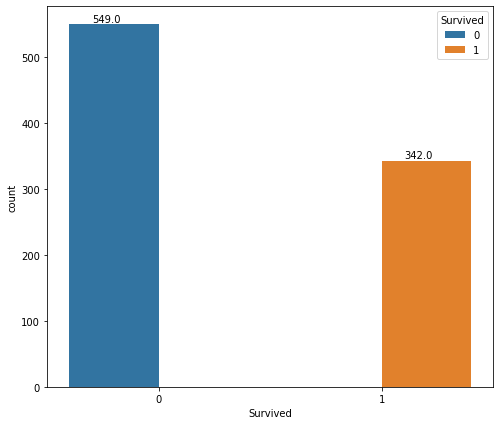

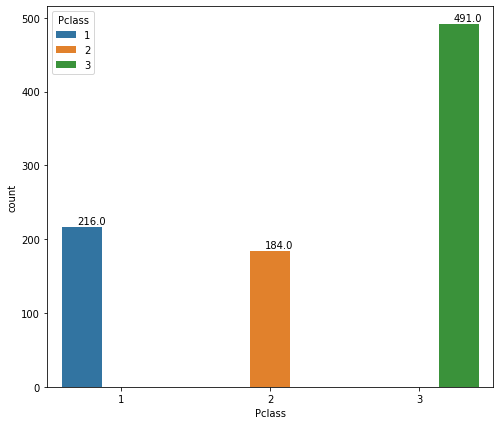

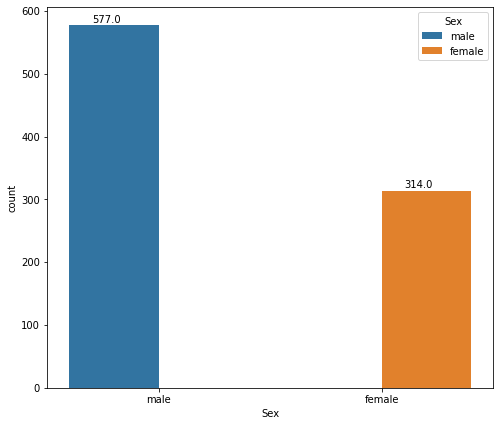

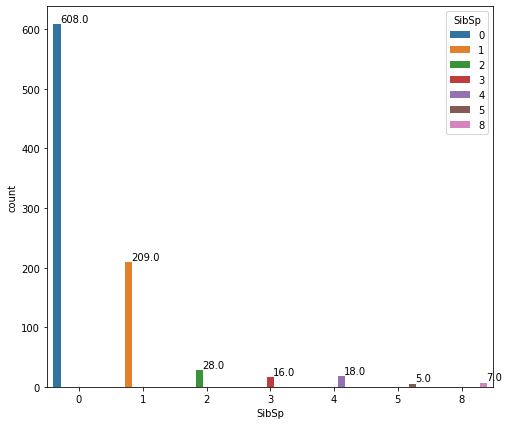

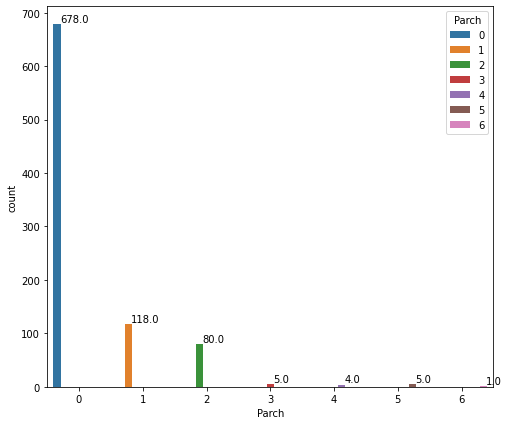

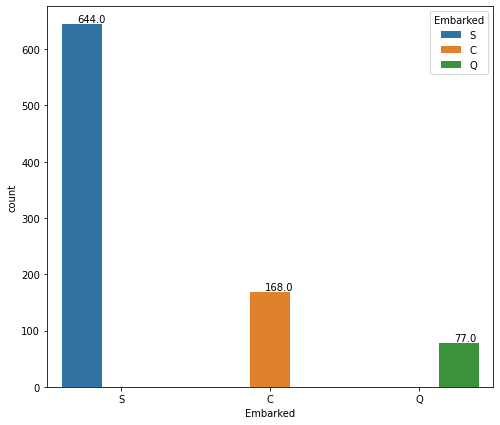

In [13]:
for inp in col_cat:
    Cat_Count_Plot(inp)                         # Count plot for all categorical Features

# Numerical Value: -

In [14]:
df[df['Age'] == 22].value_counts().to_frame()

,,,,,,,,,,,,0
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6,C2,S,1
357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0,E33,S,1
540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5,B39,C,1


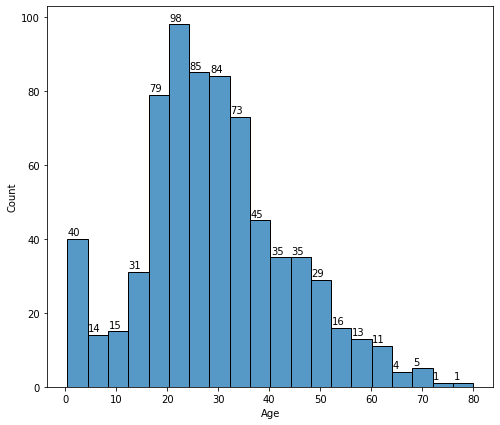

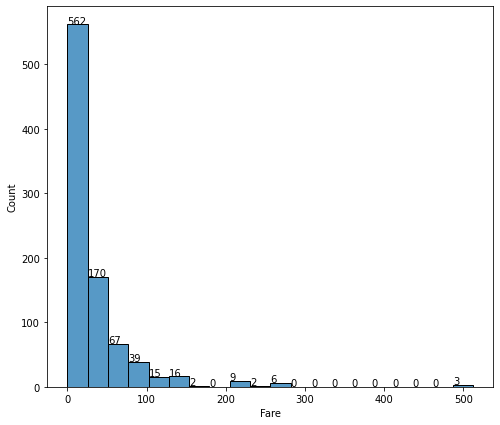

In [15]:
for inp in col_num:
    Hist_Plot(inp)

# Number of passengers survived: -

In [18]:
df_survived = pd.DataFrame()
# df_survived['Survived'] = [0, 1]
df_survived['Count'] = df['Survived'].value_counts()
df_survived['Percentage (in %)'] = df_survived.apply(lambda x: (x*100)/df.shape[0])
df_survived.index.name = 'Survived'
df_survived

,Count,Percentage (in %)
Survived,,
0,549,61.616162
1,342,38.383838


### Ratio: -

In [19]:
ratio_survived = df_survived.Count[df_survived.index == 1].to_list()[0] / df_survived.Count[df_survived.index == 0].to_list()[0]
print('Ratio for number of passengers survived \nto the number of casualties: ', ratio_survived)

Ratio for number of passengers survived 
to the number of casualties:  0.6229508196721312


## There were more casualties than those who survived.

# Number of passengers in each class: -

In [20]:
df_class = pd.DataFrame()
df_class['Count'] = df['Pclass'].value_counts()
df_class['Percentage'] = df_class.apply(lambda x: (x*100)/df.shape[0])
df_class = df_class.sort_index(ascending=True)
df_class.index.name = 'Class'
df_class

,Count,Percentage
Class,,
1,216,24.242424
2,184,20.650954
3,491,55.106622


## The majority are Class 3 passengers. Passengers in Class 1 are more than passengers in Class 2 by a small margin.

# Number of Passengers in each Gender: -

In [21]:
df_sex = pd.DataFrame()
df_sex['Count'] = df['Sex'].value_counts()
df_sex['Percentage'] = df_sex.Count.apply(lambda x: (x*100)/df.shape[0])
df_sex.index.name = 'Gender'
df_sex

,Count,Percentage
Gender,,
male,577,64.758698
female,314,35.241302


## The majority of the passengers are male (64.75%) .

# Number of passengers having Siblings or Spouse on the ship: -

In [22]:
df_class = pd.DataFrame()
df_class['Count'] = df['SibSp'].value_counts()
df_class['Percentage'] = df_class.apply(lambda x: (x*100)/df.shape[0])
df_class = df_class.sort_index(ascending=True)
df_class.index.name = 'Sibsp'
df_class

,Count,Percentage
Sibsp,,
0,608,68.237935
1,209,23.456790
2,28,3.142536
3,16,1.795735
4,18,2.020202
5,5,0.561167
8,7,0.785634


# Number of passengers having family relations on the Ship: -

In [23]:
df_class = pd.DataFrame()
df_class['Count'] = df['Parch'].value_counts()
df_class['Percentage'] = df_class.apply(lambda x: (x*100)/df.shape[0])
df_class = df_class.sort_index(ascending=True)
df_class.index.name = 'Parch'
df_class

,Count,Percentage
Parch,,
0,678,76.094276
1,118,13.243547
2,80,8.978676
3,5,0.561167
4,4,0.448934
5,5,0.561167
6,1,0.112233


# Passengers Destination Count: -

In [24]:
df_class = pd.DataFrame()
df_class['Count'] = df['Embarked'].value_counts()
df_class['Percentage'] = df_class.apply(lambda x: (x*100)/df.shape[0])
df_class = df_class.sort_values('Count', ascending=False)
df_class.index.name = 'Embarked'
df_class

,Count,Percentage
Embarked,,
S,644,72.278339
C,168,18.855219
Q,77,8.641975


In [25]:
def count_cat_relative_surivival_plot(inp):
    plt.figure(figsize=(8,8))
    ax = plt.axes()
    ax = sns.countplot(x = 'Survived', data = df, hue= inp)
    plt.show()
    df_survivors_class = df.groupby(['Survived', inp]).PassengerId.count().to_frame()
    df_survivors_class= df_survivors_class.rename(columns={'PassengerId': 'Count'}, inplace=False)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(df_survivors_class)

## Survival Vs Category PLOT: -

In [26]:
def wrt(inp):
    df_wrt = df[[inp, 'Survived']].groupby([inp], as_index=True).agg(['count', 'mean'])
    df_wrt = df_wrt['Survived']
    df_wrt['mean'] = df_wrt['mean'] * 100
    df_wrt.rename(columns={'mean': 'Percentage Survived'}, inplace=True)
    print('\n\tSurvived Vs',inp,': -\n')
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(df_wrt)

In [27]:
for inp in ['Pclass', 'Sex', 'Parch', 'SibSp']:
    wrt(inp)


	Survived Vs Pclass : -

        count  Percentage Survived
Pclass                            
1         216            62.962963
2         184            47.282609
3         491            24.236253

	Survived Vs Sex : -

        count  Percentage Survived
Sex                               
female    314            74.203822
male      577            18.890815

	Survived Vs Parch : -

       count  Percentage Survived
Parch                            
0        678            34.365782
1        118            55.084746
2         80            50.000000
3          5            60.000000
4          4             0.000000
5          5            20.000000
6          1             0.000000

	Survived Vs SibSp : -

       count  Percentage Survived
SibSp                            
0        608            34.539474
1        209            53.588517
2         28            46.428571
3         16            25.000000
4         18            16.666667
5          5             0.000000
8       

In [28]:
df_wrt_1 = pd.DataFrame()
df_wrt_1 = df.groupby(['Survived', 'Pclass']).agg(['min', 'max', 'mean'])
df_wrt_1.drop(labels=['PassengerId', 'Parch'], axis= 1, inplace=True)
df_wrt_1

Age                  SibSp                   Fare  \
                   min   max       mean   min max      mean      min   
Survived Pclass                                                        
0        1        2.00  71.0  43.695312     0   3  0.287500   0.0000   
         2       16.00  70.0  33.544444     0   2  0.319588   0.0000   
         3        1.00  74.0  26.555556     0   8  0.672043   0.0000   
1        1        0.92  80.0  35.368197     0   3  0.492647  25.9292   
         2        0.67  62.0  25.901566     0   3  0.494253  10.5000   
         3        0.42  63.0  20.646118     0   4  0.436975   0.0000   

                                      
                      max       mean  
Survived Pclass                       
0        1       263.0000  64.684008  
         2        73.5000  19.412328  
         3        69.5500  13.669364  
1        1       512.3292  95.608029  
         2        65.0000  22.055700  
         3        56.4958  13.694887

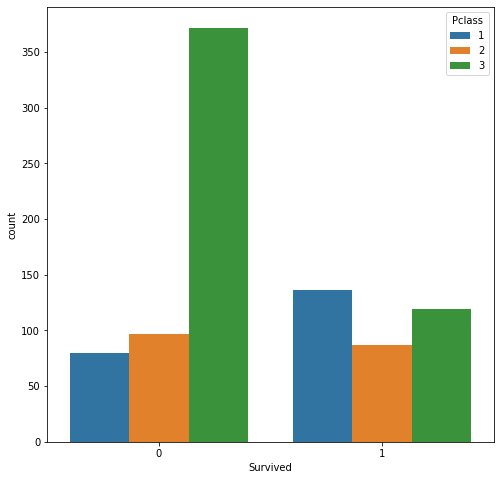

                 Count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119


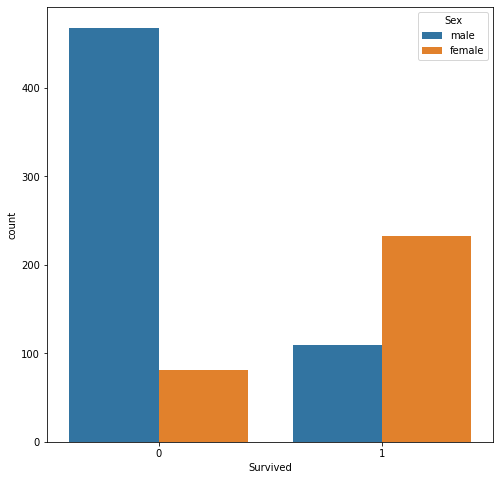

                 Count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109


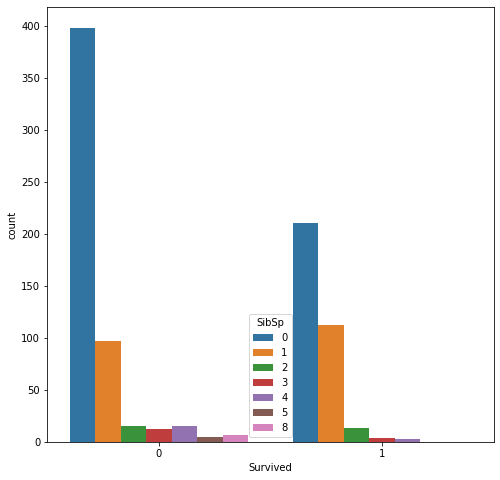

                Count
Survived SibSp       
0        0        398
         1         97
         2         15
         3         12
         4         15
         5          5
         8          7
1        0        210
         1        112
         2         13
         3          4
         4          3


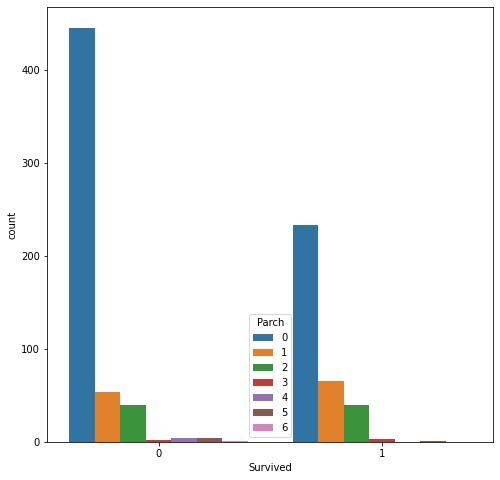

                Count
Survived Parch       
0        0        445
         1         53
         2         40
         3          2
         4          4
         5          4
         6          1
1        0        233
         1         65
         2         40
         3          3
         5          1


In [29]:
col_surv_cat = ['Pclass', 'Sex', 'SibSp', 'Parch']
for inp in col_surv_cat:
    count_cat_relative_surivival_plot(inp)

# Number of survivors and Casualties w.r.t class: -

In [30]:
# IGNORE: -
df_survivors_class = df.groupby(['Survived', 'Pclass']).PassengerId.count().to_frame()
df_survivors_class= df_survivors_class.rename(columns={'PassengerId': 'Count'}, inplace=False)
# df_survivors_class['Class_count'] = df_survivors_class['Pclass'].value_counts()
df_survivors_class

Count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

# Number of Survivors and Casualties w.r.t Sex: -

In [31]:
dF_survivors_sex = df.groupby(['Sex', 'Survived']).PassengerId.count().to_frame()
dF_survivors_sex = dF_survivors_sex.rename(columns={'PassengerId': 'Count'}, inplace = False)
dF_survivors_sex

Count
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109

# Number of Survivors and Casualties w.r.t Number of Siblings/Spouses: -

In [32]:
df_survivors_SibSp = df.groupby(['Survived', 'SibSp']).PassengerId.count().to_frame()
df_survivors_SibSp = df_survivors_SibSp.rename(columns= {'PassengerId': 'Count'}, inplace=False)
df_survivors_SibSp

Count
Survived SibSp       
0        0        398
         1         97
         2         15
         3         12
         4         15
         5          5
         8          7
1        0        210
         1        112
         2         13
         3          4
         4          3

# Number of Survivors and Casualties w.r.t Number of Parents/Children: -

In [33]:
df_survivors_parch = df.groupby(['Survived', 'Parch']).PassengerId.count().to_frame()
df_survivors_parch = df_survivors_parch.rename(columns= {'PassengerId': 'Count'}, inplace=False)
df_survivors_parch

Count
Survived Parch       
0        0        445
         1         53
         2         40
         3          2
         4          4
         5          4
         6          1
1        0        233
         1         65
         2         40
         3          3
         5          1

In [34]:
col_var = col_cat + col_num
col_var

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age', 'Fare']

## Useless features: -

In [35]:
df.drop(['PassengerId'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
col = df.columns.to_list()
col

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [37]:
df[df.Name == 'Fortune, Mr. Charles Alexander']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S


# OUTLIER DETECTION: -

In [49]:
outlier_indices = []
for c in ['Age', 'SibSp', 'Parch', 'Fare']:
    # 1st quartile
    Q1 = np.percentile(df[c],25)
    # 3rd quartile
    Q3 = np.percentile(df[c],75)
    # IQRR
    IQRRs = Q3 - Q1
    # Outlier step
    outlier_step = IQRRs * 1.5
    # detect outlier and their indeces
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    # store indeces
    outlier_indices.extend(outlier_list_col)

In [39]:
count_dict = {}                         # Dictionary with the count of each outliers occurences
for otl in outlier_indices:
    count_dict[otl] = outlier_indices.count(otl)


{7: 2,
 16: 2,
 24: 2,
 27: 3,
 50: 2,
 59: 2,
 63: 2,
 68: 2,
 71: 2,
 85: 1,
 88: 3,
 119: 2,
 159: 3,
 164: 2,
 171: 2,
 176: 2,
 180: 3,
 182: 2,
 201: 3,
 229: 2,
 233: 2,
 261: 2,
 266: 2,
 278: 2,
 324: 3,
 341: 3,
 374: 2,
 386: 2,
 409: 2,
 480: 2,
 485: 2,
 541: 2,
 542: 2,
 634: 2,
 642: 2,
 683: 2,
 686: 2,
 726: 1,
 787: 2,
 792: 3,
 813: 2,
 819: 2,
 824: 2,
 846: 3,
 850: 2,
 863: 3,
 8: 1,
 10: 1,
 13: 1,
 25: 1,
 43: 1,
 54: 1,
 58: 1,
 65: 1,
 78: 1,
 86: 1,
 93: 1,
 97: 1,
 98: 1,
 102: 2,
 118: 2,
 124: 2,
 128: 1,
 136: 1,
 140: 1,
 145: 1,
 147: 1,
 148: 1,
 153: 1,
 155: 1,
 160: 1,
 165: 1,
 166: 1,
 167: 1,
 172: 1,
 175: 1,
 183: 1,
 184: 1,
 188: 1,
 193: 1,
 197: 1,
 205: 1,
 237: 1,
 247: 1,
 248: 1,
 251: 1,
 254: 1,
 255: 1,
 259: 1,
 262: 2,
 268: 2,
 272: 1,
 273: 1,
 279: 1,
 297: 2,
 299: 2,
 305: 2,
 311: 2,
 312: 1,
 314: 1,
 318: 2,
 319: 2,
 323: 1,
 328: 1,
 329: 1,
 332: 2,
 340: 1,
 348: 1,
 352: 1,
 356: 1,
 360: 1,
 362: 1,
 377: 2,
 381: 1,


In [52]:
outliers = []
for x in count_dict.keys():
    if count_dict[x] >= 3:                  # Condition check for being a significant outlier
        outliers.append(x)

display(outliers)

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

## Outliers Are: -

In [41]:
df_outliers = df.loc[outliers]
df_outliers['outlier (manually added)'] = ['Fare', 'Fare', 'SibSp', 'SibSp', 'SibSp', 'SibSp', 'Fare', 'SibSp', 'SibSp', 'SibSp']
df_outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,outlier (manually added)
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S,Fare
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S,Fare
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,SibSp
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,SibSp
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,SibSp
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,SibSp
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S,Fare
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,SibSp
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,SibSp
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,SibSp


In [42]:
df = df.drop(outliers, axis = 0)                # Drops the outliers

In [47]:
def boxplots(inp):                              # function for box plot
    plt.figure(figsize=(8, 4))
    x = plt.axis()
    ax = sns.boxplot(x = inp, data=df)
    plt.show()

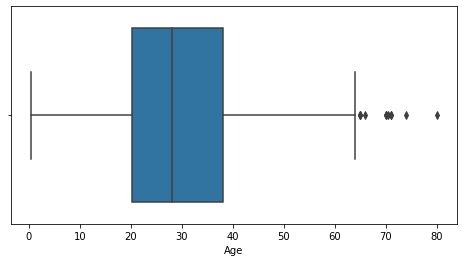

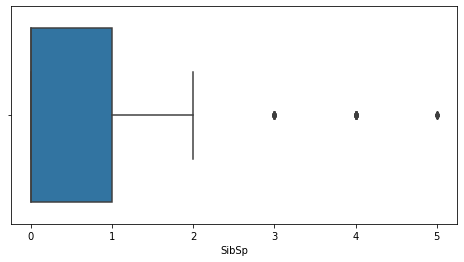

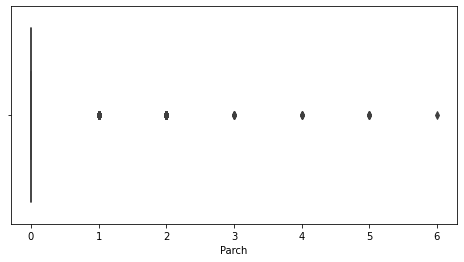

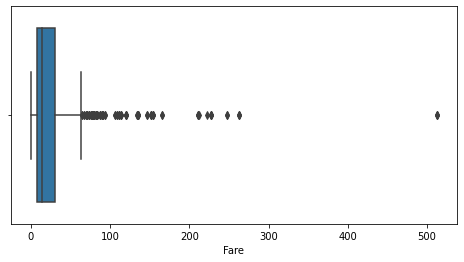

In [48]:
for inp in ['Age', 'SibSp', 'Parch', 'Fare']:
    boxplots(inp)

# Filling Missing Values: -

In [53]:
df_missing

,missing
Cabin,687
Age,177
Embarked,2


## For Embarked: -

In [59]:
missing_embarked = df[df['Embarked'].isnull()].index.tolist()
print('Embarked missing indices: ', missing_embarked)

Embarked missing indices:  [61, 829]


In [70]:
df.loc[missing_embarked]                        # both records have a fare of 80$

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Fare', ylabel='Embarked'>

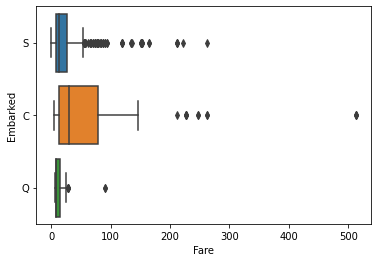

In [68]:
sns.boxplot(x= 'Fare', y= 'Embarked', data = df)

In [82]:
df = df['Embarked'].fillna('C')